# Figure 4

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pickle
from matplotlib import rcParams

rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']
rcParams['svg.fonttype'] = 'none'

In [3]:
def plot_predictions(thetas, ax):
    #fig, ax = plt.subplots(figsize=(3,1.5))

    for i in range(1, len(thetas)+1):
        y = np.array(thetas[i])
        #x = np.ones(y.shape) * np.arange(1,7) + np.random.randn(*y.shape)*1e-1
        y50 = np.nanpercentile(y, 50, axis=0)
        x50 = np.arange(1, len(y50)+1)
        ax.plot(x50, np.nanmean(y, axis=0),  linestyle="-", color='C' + str(i-1), linewidth=.7)

    #ax.set_xlabel("steps")
    #ax.set_ylabel("1 - $\\theta$")
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)
    ax.set_xticks(range(1,7))
    ax.spines["bottom"].set_bounds(1,6)
    ax.spines["left"].set_bounds(0,1)
    ax.spines["bottom"].set_linewidth(0.5)
    ax.spines["left"].set_linewidth(0.5)
    ax.set_yticks([0,.5,1])
    ax.tick_params(labelsize=8, width=0.5)
    
    #return fig, ax

## Full state results

In [4]:
dataset = "full-state-predictions"
filepath = "generated-data/%s/results/binary-output.pickle" % dataset

# Read file
with open(filepath, "rb") as f:
    data = pickle.load(f)
    thetas1 = data["thetas"]

## Two state results

In [5]:
dataset = "two-state-predictions"
filepath = "generated-data/%s/results/binary-output.pickle" % dataset

# Read file
with open(filepath, "rb") as f:
    data = pickle.load(f)
    thetas2 = data["thetas"]

## Three state results

In [6]:
dataset = "three-state-predictions"
filepath = "generated-data/%s/results/binary-output.pickle" % dataset

# Read file
with open(filepath, "rb") as f:
    data = pickle.load(f)
    thetas3 = data["thetas"]

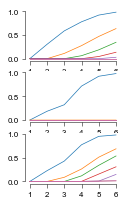

In [7]:
import matplotlib.gridspec as gridspec

fig = plt.figure(figsize=(1.7, 3.2))

gs = gridspec.GridSpec(3, 1)
ax1 = plt.subplot(gs[0, 0])
ax2 = plt.subplot(gs[1, 0], sharex=ax1)
ax3 = plt.subplot(gs[2, 0], sharex=ax1)

plot_predictions(thetas1, ax1)
plot_predictions(thetas2, ax2)
plot_predictions(thetas3, ax3)

In [35]:
fig.savefig("figures/fig-4.pdf", format="pdf", bbox_inches="tight")